# 交流潮流优化模型对比
本 notebook 展示如何对比 SOCP-AC-OPF 和 AC-OPF 两个模型
本文档包含两个模型的数学描述和对比分析：
1. **SOCP-AC-OPF**：使用二阶锥松弛的凸优化模型
2. **AC-OPF**：使用等式约束的非凸优化模型
关键差异在约束 (5)：
- SOCP: $(2P)^2 + (2Q)^2 + (l-v)^2 \leq (l+v)^2$
- AC: $P^2 + Q^2 = l \cdot v$
---

## 1. SOCP-AC-OPF 模型（二阶锥松弛模型）

### 1.1 优化模型

$$
\begin{align}
\min_{P_{t,i,j}, Q_{t,i,j}, l_{t,i,j}, v_{t,i}, p_{t,i}, q_{t,i}, P_{g,t,g}, Q_{g,t,g}, P_{DR,t,dr}} \quad & \sum_{t=0}^{T-1} \sum_{(i,j) \in E} l_{t,i,j} \\
\text{s.t.} \quad \\
& v_{t,0} = 1.0, \quad \forall t \in \{0,1,\ldots,T-1\} \tag{1} \\
\\
& p_{t,j} = \sum_{g \in G_j} P_{g,t,g} + \sum_{dr \in DR_j} P_{DR,t,dr} + P_{d,t,j}, \quad \forall t, j \in N \tag{2a} \\
\\
& q_{t,j} = \sum_{g \in G_j} Q_{g,t,g} + Q_{d,t,j}, \quad \forall t, j \in N \tag{2b} \\
\\
& p_{t,j} = \sum_{(j,k) \in E} P_{t,j,k} - \sum_{(i,j) \in E} \left( P_{t,i,j} - r_{ij} \cdot l_{t,i,j} \right), \quad \forall t, j \in N \tag{3a} \\
\\
& q_{t,j} = \sum_{(j,k) \in E} Q_{t,j,k} - \sum_{(i,j) \in E} \left( Q_{t,i,j} - x_{ij} \cdot l_{t,i,j} \right), \quad \forall t, j \in N \tag{3b} \\
\\
& v_{t,j} = v_{t,i} - 2\left( r_{ij} P_{t,i,j} + x_{ij} Q_{t,i,j} \right) + \left( r_{ij}^2 + x_{ij}^2 \right) l_{t,i,j}, \quad \forall t, (i,j) \in E \tag{4} \\
\\
& \left(2P_{t,i,j}\right)^2 + \left(2Q_{t,i,j}\right)^2 + \left(l_{t,i,j} - v_{t,i}\right)^2 \leq \left(l_{t,i,j} + v_{t,i}\right)^2, \quad \forall t, (i,j) \in E \tag{5-SOCP} \\
\\
& P_{g,\min}(t) \leq P_{g,t,g} \leq P_{g,\max}(t), \quad \forall t, g \in G \tag{6} \\
\\
& P_{DR,\min}(t) \leq P_{DR,t,dr} \leq P_{DR,\max}(t), \quad \forall t, dr \in DR \tag{7} \\
\\
& V_{\min}^2 \leq v_{t,i} \leq V_{\max}^2, \quad \forall t, i \in N \tag{8} \\
\\
& -2.5 \leq P_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9a} \\
\\
& -2.5 \leq Q_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9b} \\
\\
& 0 \leq l_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9c}
\end{align}
$$

**约束 (5-SOCP) 说明**：这是对原始非凸约束 $l_{t,i,j} \cdot v_{t,i} = P_{t,i,j}^2 + Q_{t,i,j}^2$ 的**凸松弛**（使用不等号 $\leq$），使得整个问题成为凸优化问题，可以高效求解。

---

## 2. AC-OPF 模型（等式约束模型）

### 2.1 优化模型

$$
\begin{align}
\min_{P_{t,i,j}, Q_{t,i,j}, l_{t,i,j}, v_{t,i}, p_{t,i}, q_{t,i}, P_{g,t,g}, Q_{g,t,g}, P_{DR,t,dr}} \quad & \sum_{t=0}^{T-1} \sum_{(i,j) \in E} l_{t,i,j} \\
\text{s.t.} \quad \\
& v_{t,0} = 1.0, \quad \forall t \in \{0,1,\ldots,T-1\} \tag{1} \\
\\
& p_{t,j} = \sum_{g \in G_j} P_{g,t,g} + \sum_{dr \in DR_j} P_{DR,t,dr} + P_{d,t,j}, \quad \forall t, j \in N \tag{2a} \\
\\
& q_{t,j} = \sum_{g \in G_j} Q_{g,t,g} + Q_{d,t,j}, \quad \forall t, j \in N \tag{2b} \\
\\
& p_{t,j} = \sum_{(j,k) \in E} P_{t,j,k} - \sum_{(i,j) \in E} \left( P_{t,i,j} - r_{ij} \cdot l_{t,i,j} \right), \quad \forall t, j \in N \tag{3a} \\
\\
& q_{t,j} = \sum_{(j,k) \in E} Q_{t,j,k} - \sum_{(i,j) \in E} \left( Q_{t,i,j} - x_{ij} \cdot l_{t,i,j} \right), \quad \forall t, j \in N \tag{3b} \\
\\
& v_{t,j} = v_{t,i} - 2\left( r_{ij} P_{t,i,j} + x_{ij} Q_{t,i,j} \right) + \left( r_{ij}^2 + x_{ij}^2 \right) l_{t,i,j}, \quad \forall t, (i,j) \in E \tag{4} \\
\\
& P_{t,i,j}^2 + Q_{t,i,j}^2 = l_{t,i,j} \cdot v_{t,i}, \quad \forall t, (i,j) \in E \tag{5-AC} \\
\\
& P_{g,\min}(t) \leq P_{g,t,g} \leq P_{g,\max}(t), \quad \forall t, g \in G \tag{6} \\
\\
& P_{DR,\min}(t) \leq P_{DR,t,dr} \leq P_{DR,\max}(t), \quad \forall t, dr \in DR \tag{7} \\
\\
& V_{\min}^2 \leq v_{t,i} \leq V_{\max}^2, \quad \forall t, i \in N \tag{8} \\
\\
& -2.5 \leq P_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9a} \\
\\
& -2.5 \leq Q_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9b} \\
\\
& 0 \leq l_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9c}
\end{align}
$$

**约束 (5-AC) 说明**：这是原始的**等式约束**（使用 $=$），表示支路功率的平方和等于电流平方与电压平方的乘积。这个约束是**非凸的**，使得整个问题成为非凸优化问题（NP-hard）。

---

## 3. 两个模型的关键差异

### 3.1 约束 (5) 的差异

| 模型 | 约束形式 | 数学表达式 | 问题性质 |
|------|---------|-----------|---------|
| **SOCP-AC-OPF** | 二阶锥不等式 | $(2P)^2 + (2Q)^2 + (l-v)^2 \leq (l+v)^2$ | 凸优化 |
| **AC-OPF** | 等式约束 | $P^2 + Q^2 = l \cdot v$ | 非凸优化 |

### 3.2 等价性说明

二阶锥约束展开后：
$$
\begin{align}
(2P)^2 + (2Q)^2 + (l-v)^2 &\leq (l+v)^2 \\
4P^2 + 4Q^2 + l^2 - 2lv + v^2 &\leq l^2 + 2lv + v^2 \\
4P^2 + 4Q^2 &\leq 4lv \\
P^2 + Q^2 &\leq lv
\end{align}
$$

因此：
- **SOCP 模型**使用 $P^2 + Q^2 \leq lv$（松弛）
- **AC 模型**使用 $P^2 + Q^2 = lv$（精确）

### 3.3 松弛间隙定义

定义**松弛量** (slack) 为：
$$
\text{slack}_{t,i,j} = l_{t,i,j} \cdot v_{t,i} - \left(P_{t,i,j}^2 + Q_{t,i,j}^2\right)
$$

- 对于 AC 模型：$\text{slack} = 0$（等式约束）
- 对于 SOCP 模型：$\text{slack} \geq 0$（不等式约束）

**松弛是否紧 (tight)**：
- 如果 SOCP 模型的最优解满足 $\text{slack} \approx 0$（在数值精度内），则称松弛是**紧的**
- 紧的松弛意味着 SOCP 模型的解就是原始 AC 模型的精确解

---

## 4. 决策变量（两个模型相同）

### 4.1 支路变量
- $P_{t,i,j}$：支路 $(i,j)$ 在时段 $t$ 的有功功率 (p.u.)
- $Q_{t,i,j}$：支路 $(i,j)$ 在时段 $t$ 的无功功率 (p.u.)
- $l_{t,i,j}$：支路 $(i,j)$ 在时段 $t$ 的电流幅值平方 $|I_{ij}|^2$ (p.u.)

### 4.2 节点变量
- $v_{t,i}$：节点 $i$ 在时段 $t$ 的电压幅值平方 $|V_i|^2$ (p.u.)
- $p_{t,i}$：节点 $i$ 在时段 $t$ 的有功注入功率 (p.u.)
- $q_{t,i}$：节点 $i$ 在时段 $t$ 的无功注入功率 (p.u.)

### 4.3 发电机变量
- $P_{g,t,g}$：发电机 $g$ 在时段 $t$ 的有功出力 (p.u.)
- $Q_{g,t,g}$：发电机 $g$ 在时段 $t$ 的无功出力 (p.u.)

### 4.4 可调负荷变量
- $P_{DR,t,dr}$：可调负荷 $dr$ 在时段 $t$ 的削减量 (p.u.)（正数表示削减）

---

## 5. 模型参数（两个模型相同）

### 5.1 集合
- $N$：节点集合，$|N| = 33$
- $E$：支路集合，$|E| = 32$
- $G$：发电机集合
- $DR$：可调负荷集合
- $G_j$：连接在节点 $j$ 的发电机集合
- $DR_j$：连接在节点 $j$ 的可调负荷集合

### 5.2 网络参数
- $r_{ij}$：支路 $(i,j)$ 的电阻 (p.u.)
- $x_{ij}$：支路 $(i,j)$ 的电抗 (p.u.)

### 5.3 其他参数
- $T$：时间断面数
- $P_{d,t,j}, Q_{d,t,j}$：节点 $j$ 在时段 $t$ 的固定负荷
- $V_{\min} = 0.9$ p.u., $V_{\max} = 1.1$ p.u.

---

## 6. 数值对比结果（IEEE 33节点系统）

### 6.1 求解状态

| 模型 | 求解状态 | 求解器 | 求解时间 |
|------|---------|--------|---------|
| SOCP-AC-OPF | 最优 | Barrier (10 iterations) | 0.01s |
| AC-OPF | 最优 | MIP (1 node, 180 iterations) | 0.01s |

### 6.2 目标函数对比

| 指标 | SOCP 模型 | AC 模型 | 差异 |
|------|----------|---------|------|
| 目标函数值 $\sum l$ | **0.7902633383** | **0.7902625606** | $7.78 \times 10^{-7}$ |
| 相对松弛间隙 | - | - | **0.000098%** |

### 6.3 松弛间隙统计

| 统计量 | 数值 |
|--------|------|
| 最大松弛量 $\max(\text{slack})$ | $3.17 \times 10^{-7}$ |
| 平均松弛量 | $2.08 \times 10^{-8}$ |
| 总松弛量 | $6.66 \times 10^{-7}$ |

**结论：二阶锥松弛是紧的 (tight relaxation)**

所有支路的松弛量都小于 $10^{-6}$，表明 SOCP 模型的解与 AC 模型的精确解几乎相同。

### 6.4 典型支路的松弛间隙

| 支路 | SOCP: $P^2+Q^2$ | SOCP: $l \cdot v$ | AC: $P^2+Q^2$ | AC: $l \cdot v$ | 松弛量 |
|------|----------------|------------------|--------------|---------------|-------|
| 1→2 | 0.2127810856 | 0.2127811256 | 0.2127810564 | 0.2127810564 | $3.99 \times 10^{-8}$ |
| 2→3 | 0.1673767790 | 0.1673768119 | 0.1673767671 | 0.1673767671 | $3.29 \times 10^{-8}$ |
| 20→21 | 0.0003888015 | 0.0003891184 | 0.0003888010 | 0.0003888010 | $3.17 \times 10^{-7}$ |

---

## 7. 潮流结果计算公式（两个模型相同）

### 7.1 节点相角计算

对于时段 $t$，节点相角向量 $\boldsymbol{\theta}_t$（弧度）：

$$
\boldsymbol{\theta}_t = (A_t^T)^{-1} \boldsymbol{\beta}_t
$$

其中：
- $A_t$：节点-支路关联矩阵
- $\boldsymbol{\beta}_t$：支路相角差向量

### 7.2 支路功率相量

$$
S_{ij} = P_{t,i,j}^* + j Q_{t,i,j}^*
$$

$$
\angle S_{ij} = \arctan\left(\frac{Q_{t,i,j}^*}{P_{t,i,j}^*}\right)
$$

### 7.3 支路电流相量

$$
I_{ij} = \sqrt{l_{t,i,j}^*} \cdot e^{j(\theta_i - \angle S_{ij})}
$$

- 幅值：$|I_{ij}| = \sqrt{l_{t,i,j}^*}$
- 相角：$\angle I_{ij} = \theta_i - \angle S_{ij}$

### 7.4 节点电压相量

$$
V_j = \sqrt{v_{t,j}^*} \cdot e^{j\theta_j}
$$

- 幅值：$|V_j| = \sqrt{v_{t,j}^*}$
- 相角：$\angle V_j = \theta_j$

### 7.5 节点注入复功率

$$
s_{0,j} = p_{t,j}^* + j q_{t,j}^*
$$

---

## 8. 模型特点对比

| 特性 | SOCP-AC-OPF | AC-OPF |
|------|------------|--------|
| **问题性质** | 凸优化 | 非凸优化 (NP-hard) |
| **全局最优性** | 保证全局最优 | 可能陷入局部最优 |
| **求解效率** | 高（多项式时间） | 低（可能需要全局优化算法） |
| **解的精确性** | 松弛解（可能不精确） | 精确解 |
| **松弛紧性** | 辐射网络通常紧 | 不适用 |
| **适用场景** | 辐射状配电网 | 一般配电网 |
| **求解器** | Gurobi | Gurobi |

---

## 9. 结论

1. **松弛紧性**：在 IEEE 33 节点辐射状配电网络中，SOCP 松弛是**紧的**，相对松弛间隙仅为 0.000098%

2. **求解效率**：SOCP 模型和 AC 模型的求解时间相近（均为 0.01s），但 SOCP 模型保证全局最优

3. **实用性**：
   - 对于辐射状配电网，优先使用 **SOCP-AC-OPF** 模型（凸优化，保证全局最优）
   - 对于环网或需要精确解的情况，使用 **AC-OPF** 模型（但可能需要全局优化算法）

4. **数值验证**：最大松弛量 $3.17 \times 10^{-7}$ 远小于数值精度要求 $10^{-6}$，验证了松弛的紧性

---

## 10. 输出文件说明

每个时间断面 $t$ 的结果保存在以下 CSV 文件中：

### 10.1 支路结果 (`{model_type}_branch_t{t}.csv`)
- `from_bus`, `to_bus`：支路起止节点
- `P_MW`, `Q_MVar`：支路有功和无功功率 (MW, MVar)
- `l_pu`：电流幅值平方 (p.u.)
- `I_magnitude_pu`：电流幅值 (p.u.)
- `r_ij`, `x_ij`：支路电阻和电抗

### 10.2 节点结果 (`{model_type}_bus_t{t}.csv`)
- `bus`：节点编号
- `v_pu_squared`：电压幅值平方 (p.u.)
- `V_magnitude_pu`：电压幅值 (p.u.)
- `p_inject_pu`, `q_inject_pu`：节点注入功率 (p.u.)
- `P_inject_MW`, `Q_inject_MVar`：节点注入功率 (MW, MVar)

### 10.3 发电机结果 (`{model_type}_gen_t{t}.csv`)
- `gen_id`：发电机编号
- `Pg_pu`, `Qg_pu`：发电机出力 (p.u.)
- `Pg_MW`, `Qg_MVar`：发电机出力 (MW, MVar)

---

**注**：该模型实现基于 Gurobi 13.0.0 求解器，使用了高精度参数设置（`MIPGap=1e-8`, `OptimalityTol=1e-8`, `FeasibilityTol=1e-8`）以确保求解精度。


# 交流潮流优化模型对比代码实现
## 1. 运行模型对比

In [19]:
# 直接运行对比脚本
"""
对比 SOCP-AC-OPF 和 AC-OPF 模型
1. SOC_ACOPF_Model: 使用二阶锥松弛 (<=)
2. ACOPF_Model: 使用等式约束 (==)
"""

import numpy as np
import pandas as pd
import os
import gurobipy as gp
from gurobipy import GRB
from case33 import case33

def solve_model(model_type="SOCP"):
    """
    求解优化模型

    Parameters:
    -----------
    model_type : str
        "SOCP" 或 "AC"，表示使用二阶锥松弛还是等式约束

    Returns:
    --------
    model : Gurobi Model
        求解后的模型
    results : dict
        包含所有决策变量的结果字典
    """
    # --------------------- 电压上下界 ---------------------
    Vmax = 1.1  # 电压上限 (p.u.)
    Vmin = 0.9  # 电压下限 (p.u.)

    # ------------------ 初始化数据 ----------------------
    ppc_0 = case33()
    T = int(ppc_0["T"])  # 时间断面数
    bus_data    = ppc_0['bus']    # 母线数据
    branch_data = ppc_0['branch'] # 支路数据
    gen_data    = ppc_0["gen"]    # 发电机数据
    gencost_data= ppc_0["gencost"]# 发电机成本数据
    DRload_data = ppc_0["DRload"] # 灵活可调负荷数据
    DRcost_data = ppc_0["DRloadcost"] # 灵活可调负荷成本数据
    num_n  = bus_data.shape[0]    # 节点个数
    num_gen = gen_data.shape[0]   # 发电机总数
    num_dr = DRload_data.shape[0]   # 灵活可调负荷总数

    # ---------------------- 初始化点集 N 和边集 E -------------------------
    N = [int(row[0] - 1) for row in bus_data]
    E = []
    for row in branch_data:
        i_idx = int(row[0] - 1)  # fbus-1
        j_idx = int(row[1] - 1)  # tbus-1
        r_ij = row[2]            # branch resistance p.u.
        x_ij = row[3]            # branch reactance p.u.
        E.append((i_idx, j_idx, r_ij, x_ij))

    # ---------------------- 创建 Gurobi 模型 --------------------------------
    model_name = f"{model_type}_ACOPF_Model"
    model = gp.Model(model_name)

    # ----------------多时段决策变量初始化 ----------------
    P = model.addVars(range(T), E, lb=-2.5, ub=2.5, name="P")
    Q = model.addVars(range(T), E, lb=-2.5, ub=2.5, name="Q")
    l = model.addVars(range(T), E, lb=0,    ub=2.5, name="l")
    v = model.addVars(range(T), N, lb=Vmin**2, ub=Vmax**2, name="v")
    p = model.addVars(range(T), N, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="p")
    q = model.addVars(range(T), N, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="q")
    P_g = model.addVars(range(T), range(num_gen), lb=0, ub=GRB.INFINITY, name="Pg")
    Q_g = model.addVars(range(T), range(num_gen), lb=-GRB.INFINITY, ub=GRB.INFINITY, name="Qg")
    P_DR = model.addVars(range(T), range(num_dr), lb=-GRB.INFINITY, ub=GRB.INFINITY, name="P_DR")

    # ---------------- 可调节机组 ----------------
    gens_at_bus = {bus_idx: [] for bus_idx in N}
    for g_idx in range(num_gen):
        bus_i = int(gen_data[g_idx, 0] - 1)
        gens_at_bus[bus_i].append(g_idx)

    # ---------------- 可调节负荷（DR） ----------------
    DR_at_bus = {bus_idx: [] for bus_idx in N}
    for DR_idx in range(num_dr):
        bus_i = int(DRload_data[DR_idx, 0] - 1)
        DR_at_bus[bus_i].append(DR_idx)

    # ------------------- 构造目标函数 -------------------
    obj_expr = gp.LinExpr()

    # ------------------- 循环每个时段 t，添加约束 + 累加目标 -------------------
    for t_idx in range(T):
        ppc_t = case33(t_idx)

        # ------------------------固定负荷------------------------
        P_d = list(-ppc_t["bus"][:,2] / ppc_t["baseMVA"])
        Q_d = list(-ppc_t["bus"][:,3] / ppc_t["baseMVA"])

        # ------------------------发电机出力范围约束------------------------
        for j in N:
            for g in gens_at_bus[j]:
                P_g[t_idx, g].setAttr("LB", ppc_t["gen"][g][9]/ ppc_t["baseMVA"])
                P_g[t_idx, g].setAttr("UB", ppc_t["gen"][g][8]/ ppc_t["baseMVA"])

        # ------------------------负荷调节范围约束------------------------
        for j in N:
            for dr in DR_at_bus[j]:
                P_DR[t_idx, dr].setAttr("LB", ppc_t["DRload"][dr][9]/ ppc_t["baseMVA"])
                P_DR[t_idx, dr].setAttr("UB", ppc_t["DRload"][dr][8]/ ppc_t["baseMVA"])

        # ------------------------电压调节范围约束------------------------
        model.addConstr(v[t_idx, 0] == 1.0**2, name=f"v_fixed_{t_idx}")

        # ----------- 构造节点净注入功率表达式 -----------
        for j in N:
            model.addConstr(
                p[t_idx,j] == gp.quicksum(P_g[t_idx,g] for g in gens_at_bus[j]) +
                              gp.quicksum(P_DR[t_idx,dr] for dr in DR_at_bus[j]) +
                              P_d[j],
                name=f"NetInjP_t{t_idx}_bus{j}"
            )
            model.addConstr(
                q[t_idx,j] == gp.quicksum(Q_g[t_idx,g] for g in gens_at_bus[j]) + Q_d[j],
                name=f"NetInjQ_t{t_idx}_bus{j}"
            )

        # ----------------------潮流平衡 (BFM) 约束----------------------
        for node_j in N:
            out_edges_j = [(i,k,r,x) for (i,k,r,x) in E if i == node_j]
            in_edges_j  = [(i,k,r,x) for (i,k,r,x) in E if k == node_j]

            model.addConstr(
                p[t_idx,node_j] ==
                gp.quicksum(P[(t_idx,i,k,r,x)] for (i,k,r,x) in out_edges_j)
                - gp.quicksum( (P[(t_idx,i,k,r,x)]  - r*l[(t_idx,i,k,r,x)]) for (i,k,r,x) in in_edges_j ),
                name=f"P_Balance_t{t_idx}_bus{node_j}"
            )
            model.addConstr(
                q[t_idx,node_j] ==
                gp.quicksum(Q[(t_idx,i,k,r,x)] for (i,k,r,x) in out_edges_j)
                - gp.quicksum( (Q[(t_idx,i,k,r,x)] - x*l[(t_idx,i,k,r,x)]) for (i,k,r,x) in in_edges_j ),
                name=f"Q_Balance_t{t_idx}_bus{node_j}"
            )

        # ---------------------- 电压约束 (DistFlow) ----------------------
        for (start_bus, end_bus, r_ij, x_ij) in E:
            model.addConstr(
                v[t_idx, end_bus] == v[t_idx, start_bus]
                   - 2*(r_ij*P[(t_idx,start_bus,end_bus,r_ij,x_ij)]
                        + x_ij*Q[(t_idx,start_bus,end_bus,r_ij,x_ij)])
                   + (r_ij**2 + x_ij**2)* l[(t_idx,start_bus,end_bus,r_ij,x_ij)],
                name=f"Voltage_t{t_idx}_{start_bus}_{end_bus}"
            )

        # ---------------------- 关键差异：二阶锥约束或等式约束 ----------------------
        for (start_bus, end_bus, r_ij, x_ij) in E:
            if model_type == "SOCP":
                # 二阶锥松弛: (2P)^2 + (2Q)^2 + (l-v)^2 <= (l+v)^2
                lhs = (
                    (2*P[(t_idx,start_bus,end_bus,r_ij,x_ij)])**2
                  + (2*Q[(t_idx,start_bus,end_bus,r_ij,x_ij)])**2
                  + (l[(t_idx,start_bus,end_bus,r_ij,x_ij)] - v[t_idx, start_bus])**2
                )
                rhs = (l[(t_idx,start_bus,end_bus,r_ij,x_ij)] + v[t_idx, start_bus])**2
                model.addQConstr(lhs <= rhs, name=f"SOCP_t{t_idx}_{start_bus}_{end_bus}")
            else:  # model_type == "AC"
                # 等式约束: P^2 + Q^2 = l * v
                model.addQConstr(
                    P[(t_idx,start_bus,end_bus,r_ij,x_ij)]**2 +
                    Q[(t_idx,start_bus,end_bus,r_ij,x_ij)]**2 ==
                    l[(t_idx,start_bus,end_bus,r_ij,x_ij)] * v[t_idx, start_bus],
                    name=f"AC_t{t_idx}_{start_bus}_{end_bus}"
                )

        # ---------------------- 目标函数 ----------------------
        for (start_bus, end_bus, r_ij, x_ij) in E:
            obj_expr += l[(t_idx,start_bus,end_bus,r_ij,x_ij)]

    # ---------------------- 设置模型的总目标并求解 ----------------------
    model.setObjective(obj_expr, GRB.MINIMIZE)
    model.update()

    # 输出模型文件
    model.write(f"output/{model_type}_ACOPF.lp")

    # 设置求解精度参数
    model.setParam('MIPGap',         1e-8)
    model.setParam('OptimalityTol',  1e-8)
    model.setParam('FeasibilityTol', 1e-8)
    model.setParam('OutputFlag',     1)
    model.setParam('NonConvex',      2)  # 允许非凸二次约束

    # 求解
    print(f"\n{'='*80}")
    print(f"正在求解 {model_type}-AC-OPF 模型...")
    print(f"{'='*80}\n")
    model.optimize()

    # 收集结果
    results = {
        'model': model,
        'P': P,
        'Q': Q,
        'l': l,
        'v': v,
        'p': p,
        'q': q,
        'P_g': P_g,
        'Q_g': Q_g,
        'P_DR': P_DR,
        'T': T,
        'N': N,
        'E': E,
        'num_gen': num_gen,
        'num_dr': num_dr,
        'ppc_0': ppc_0
    }

    return model, results


def save_results_to_csv(results, model_type="SOCP", output_dir="output"):
    """
    将每个时间断面的结果保存到单独的 CSV 文件

    Parameters:
    -----------
    results : dict
        包含所有决策变量的结果字典
    model_type : str
        模型类型 "SOCP" 或 "AC"
    output_dir : str
        输出目录
    """
    # 创建输出目录
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    model = results['model']
    if model.status != GRB.OPTIMAL:
        print(f"警告：模型未找到最优解，状态码：{model.status}")
        return

    T = results['T']
    N = results['N']
    E = results['E']
    P = results['P']
    Q = results['Q']
    l = results['l']
    v = results['v']
    p = results['p']
    q = results['q']
    P_g = results['P_g']
    Q_g = results['Q_g']
    P_DR = results['P_DR']
    num_gen = results['num_gen']

    # 对每个时间断面
    for t_idx in range(T):
        # ==================== 支路结果 ====================
        branch_data = []
        for (start_bus, end_bus, r_ij, x_ij) in E:
            branch_data.append({
                'from_bus': start_bus + 1,  # 转回1-indexed
                'to_bus': end_bus + 1,
                'P_MW': P[(t_idx, start_bus, end_bus, r_ij, x_ij)].X * results['ppc_0']['baseMVA'],
                'Q_MVar': Q[(t_idx, start_bus, end_bus, r_ij, x_ij)].X * results['ppc_0']['baseMVA'],
                'l_pu': l[(t_idx, start_bus, end_bus, r_ij, x_ij)].X,
                'I_magnitude_pu': np.sqrt(l[(t_idx, start_bus, end_bus, r_ij, x_ij)].X),
                'r_ij': r_ij,
                'x_ij': x_ij
            })
        df_branch = pd.DataFrame(branch_data)
        df_branch.to_csv(f"{output_dir}/{model_type}_branch_t{t_idx}.csv", index=False)

        # ==================== 节点结果 ====================
        bus_data = []
        for j in N:
            bus_data.append({
                'bus': j + 1,  # 转回1-indexed
                'v_pu_squared': v[t_idx, j].X,
                'V_magnitude_pu': np.sqrt(v[t_idx, j].X),
                'p_inject_pu': p[t_idx, j].X,
                'q_inject_pu': q[t_idx, j].X,
                'P_inject_MW': p[t_idx, j].X * results['ppc_0']['baseMVA'],
                'Q_inject_MVar': q[t_idx, j].X * results['ppc_0']['baseMVA']
            })
        df_bus = pd.DataFrame(bus_data)
        df_bus.to_csv(f"{output_dir}/{model_type}_bus_t{t_idx}.csv", index=False)

        # ==================== 发电机结果 ====================
        gen_data = []
        for g in range(num_gen):
            gen_data.append({
                'gen_id': g,
                'Pg_pu': P_g[t_idx, g].X,
                'Qg_pu': Q_g[t_idx, g].X,
                'Pg_MW': P_g[t_idx, g].X * results['ppc_0']['baseMVA'],
                'Qg_MVar': Q_g[t_idx, g].X * results['ppc_0']['baseMVA']
            })
        df_gen = pd.DataFrame(gen_data)
        df_gen.to_csv(f"{output_dir}/{model_type}_gen_t{t_idx}.csv", index=False)

    print(f"\n{model_type} 模型结果已保存到 {output_dir}/ 目录")


def compare_models(results_socp, results_ac):
    """
    比较两个模型的松弛间隙

    Parameters:
    -----------
    results_socp : dict
        SOCP模型的结果
    results_ac : dict
        AC模型的结果
    """
    model_socp = results_socp['model']
    model_ac = results_ac['model']

    print("\n" + "="*80)
    print("模型对比结果")
    print("="*80)

    # 检查模型状态
    print(f"\nSOCP 模型状态: {model_socp.status} ", end="")
    if model_socp.status == GRB.OPTIMAL:
        print("(最优)")
    else:
        print("(非最优)")

    print(f"AC 模型状态: {model_ac.status} ", end="")
    if model_ac.status == GRB.OPTIMAL:
        print("(最优)")
    else:
        print("(非最优)")

    if model_socp.status != GRB.OPTIMAL or model_ac.status != GRB.OPTIMAL:
        print("\n警告：至少一个模型未找到最优解，无法进行准确比较")
        return

    # 比较目标函数值
    obj_socp = model_socp.ObjVal
    obj_ac = model_ac.ObjVal

    print(f"\n{'指标':<30} {'SOCP模型':<20} {'AC模型':<20} {'差异':<20}")
    print("-" * 90)
    print(f"{'目标函数值 (Σl)':<30} {obj_socp:<20.10f} {obj_ac:<20.10f} {abs(obj_socp - obj_ac):<20.10e}")

    # 计算松弛间隙
    if obj_ac > 1e-10:  # 避免除以零
        gap_percent = (obj_socp - obj_ac) / obj_ac * 100
        print(f"{'相对松弛间隙 (%)':<30} {'':<20} {'':<20} {gap_percent:<20.6f}")

    # 比较具体变量的松弛间隙
    print("\n" + "="*80)
    print("各时段各支路的松弛间隙检验")
    print("="*80)

    T = results_socp['T']
    E = results_socp['E']
    P_socp = results_socp['P']
    Q_socp = results_socp['Q']
    l_socp = results_socp['l']
    v_socp = results_socp['v']

    P_ac = results_ac['P']
    Q_ac = results_ac['Q']
    l_ac = results_ac['l']
    v_ac = results_ac['v']

    max_violation = 0
    total_violation = 0
    count = 0

    for t_idx in range(T):
        print(f"\n时段 t={t_idx}:")
        print(f"{'支路':<15} {'SOCP: P²+Q²':<20} {'SOCP: l*v':<20} {'AC: P²+Q²':<20} {'AC: l*v':<20} {'SOCP松弛量':<20}")
        print("-" * 115)

        for (start_bus, end_bus, r_ij, x_ij) in E:
            # SOCP 模型
            P_val_socp = P_socp[(t_idx, start_bus, end_bus, r_ij, x_ij)].X
            Q_val_socp = Q_socp[(t_idx, start_bus, end_bus, r_ij, x_ij)].X
            l_val_socp = l_socp[(t_idx, start_bus, end_bus, r_ij, x_ij)].X
            v_val_socp = v_socp[t_idx, start_bus].X

            lhs_socp = P_val_socp**2 + Q_val_socp**2
            rhs_socp = l_val_socp * v_val_socp
            slack_socp = rhs_socp - lhs_socp

            # AC 模型
            P_val_ac = P_ac[(t_idx, start_bus, end_bus, r_ij, x_ij)].X
            Q_val_ac = Q_ac[(t_idx, start_bus, end_bus, r_ij, x_ij)].X
            l_val_ac = l_ac[(t_idx, start_bus, end_bus, r_ij, x_ij)].X
            v_val_ac = v_ac[t_idx, start_bus].X

            lhs_ac = P_val_ac**2 + Q_val_ac**2
            rhs_ac = l_val_ac * v_val_ac

            print(f"{start_bus+1:>2}->{end_bus+1:<2} {lhs_socp:<20.10e} {rhs_socp:<20.10e} {lhs_ac:<20.10e} {rhs_ac:<20.10e} {slack_socp:<20.10e}")

            max_violation = max(max_violation, slack_socp)
            total_violation += slack_socp
            count += 1

    print("\n" + "="*80)
    print("松弛间隙统计")
    print("="*80)
    print(f"最大松弛量 (l*v - P²-Q²): {max_violation:.10e}")
    print(f"平均松弛量: {total_violation/count:.10e}")
    print(f"总松弛量: {total_violation:.10e}")

    # 判断松弛是否紧
    if max_violation < 1e-6:
        print("\n结论: 二阶锥松弛是紧的 (relaxation is tight)")
    else:
        print("\n结论: 二阶锥松弛不紧，存在松弛间隙")


if __name__ == "__main__":
    # 1. 求解 SOCP 模型
    model_socp, results_socp = solve_model(model_type="SOCP")

    # 2. 求解 AC 模型（等式约束）
    model_ac, results_ac = solve_model(model_type="AC")

    # 3. 保存结果到 CSV
    save_results_to_csv(results_socp, model_type="SOCP", output_dir="output")
    save_results_to_csv(results_ac, model_type="AC", output_dir="output")

    # 4. 比较两个模型
    compare_models(results_socp, results_ac)

    print("\n" + "="*80)
    print("所有任务完成！")
    print("="*80)


Set parameter MIPGap to value 1e-08
Set parameter OptimalityTol to value 1e-08
Set parameter FeasibilityTol to value 1e-08
Set parameter OutputFlag to value 1
Set parameter NonConvex to value 2

正在求解 SOCP-AC-OPF 模型...

Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.2.0 25C56)

CPU model: Apple M4 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
FeasibilityTol  1e-08
MIPGap  1e-08
OptimalityTol  1e-08
NonConvex  2

Optimize a model with 165 rows, 197 columns and 487 nonzeros (Min)
Model fingerprint: 0x1f0f46b3
Model has 32 linear objective coefficients
Model has 32 quadratic constraints
Coefficient statistics:
  Matrix range     [4e-05, 1e+00]
  QMatrix range    [4e+00, 4e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [8e-01, 2e+00]
  RHS range        [1e-03, 1e+00]
Presolve removed 69 rows and 69 columns
Presolve time: 0.00s
Presolved: 161 rows, 192 columns, 540 nonzeros
Presolved model has 

## 2. 查看生成的结果文件

In [20]:
import pandas as pd
import os

# 列出所有输出文件
output_files = sorted([f for f in os.listdir('output') if f.endswith('.csv')])
print("生成的 CSV 文件：")
for f in output_files:
    if f.startswith('SOCP') or f.startswith('AC'):
        print(f"  - {f}")

生成的 CSV 文件：
  - AC_branch_t0.csv
  - AC_bus_t0.csv
  - AC_gen_t0.csv
  - SOCP_branch_t0.csv
  - SOCP_bus_t0.csv
  - SOCP_gen_t0.csv


## 3. 对比 SOCP 和 AC 模型的支路潮流结果

In [21]:
# 读取两个模型的支路结果
t = 0  # 时间断面

df_socp_branch = pd.read_csv(f'output/SOCP_branch_t{t}.csv')
df_ac_branch = pd.read_csv(f'output/AC_branch_t{t}.csv')

# 合并对比
df_compare = pd.DataFrame({
    'from_bus': df_socp_branch['from_bus'],
    'to_bus': df_socp_branch['to_bus'],
    'SOCP_P_MW': df_socp_branch['P_MW'],
    'AC_P_MW': df_ac_branch['P_MW'],
    'P_diff': df_socp_branch['P_MW'] - df_ac_branch['P_MW'],
    'SOCP_I_pu': df_socp_branch['I_magnitude_pu'],
    'AC_I_pu': df_ac_branch['I_magnitude_pu'],
    'I_diff': df_socp_branch['I_magnitude_pu'] - df_ac_branch['I_magnitude_pu']
})

print(f"\n时段 t={t} 的支路潮流对比（前10条支路）：")
print(df_compare.head(10).to_string(index=False))


时段 t=0 的支路潮流对比（前10条支路）：
 from_bus  to_bus  SOCP_P_MW  AC_P_MW       P_diff  SOCP_I_pu  AC_I_pu       I_diff
        1       2   3.917677 3.917677 2.342859e-07   0.461282 0.461282 7.495785e-08
        2       3   3.444299 3.444299 1.145129e-07   0.410335 0.410335 5.498294e-08
        3       4   2.362895 2.362895 9.491467e-08   0.295206 0.295206 4.557832e-08
        4       5   2.222995 2.222995 8.883415e-08   0.280429 0.280429 2.897975e-08
        5       6   2.144296 2.144296 8.526111e-08   0.273590 0.273590 4.899955e-08
        6       7   1.095267 1.095267 5.082466e-08   0.128030 0.128030 9.403523e-08
        7       8   0.893353 0.893353 4.804038e-08   0.104402 0.104402 1.540399e-07
        8       9   0.688515 0.688515 3.384647e-08   0.080655 0.080655 4.759196e-08
        9      10   0.624334 0.624334 2.898016e-08   0.073937 0.073937 2.442301e-08
       10      11   0.560773 0.560773 2.680495e-08   0.067186 0.067186 3.603335e-08


## 4. 对比节点电压结果

In [22]:
# 读取两个模型的节点结果
df_socp_bus = pd.read_csv(f'output/SOCP_bus_t{t}.csv')
df_ac_bus = pd.read_csv(f'output/AC_bus_t{t}.csv')

# 合并对比
df_compare_bus = pd.DataFrame({
    'bus': df_socp_bus['bus'],
    'SOCP_V_pu': df_socp_bus['V_magnitude_pu'],
    'AC_V_pu': df_ac_bus['V_magnitude_pu'],
    'V_diff': df_socp_bus['V_magnitude_pu'] - df_ac_bus['V_magnitude_pu'],
    'SOCP_P_MW': df_socp_bus['P_inject_MW'],
    'AC_P_MW': df_ac_bus['P_inject_MW']
})

print(f"\n时段 t={t} 的节点电压对比（前10个节点）：")
print(df_compare_bus.head(10).to_string(index=False))


时段 t=0 的节点电压对比（前10个节点）：
 bus  SOCP_V_pu  AC_V_pu        V_diff  SOCP_P_MW   AC_P_MW
   1   1.000000 1.000000  0.000000e+00   3.917677  3.917677
   2   0.997032 0.997032 -1.107172e-10  -0.100000 -0.100000
   3   0.982938 0.982938 -5.842320e-10  -0.090000 -0.090000
   4   0.975456 0.975456 -8.952845e-10  -0.120000 -0.120000
   5   0.968059 0.968059 -1.208823e-09  -0.060000 -0.060000
   6   0.949658 0.949658 -1.974996e-09  -0.060000 -0.060000
   7   0.946173 0.946173 -2.187055e-09  -0.200000 -0.200000
   8   0.941328 0.941328 -2.434652e-09  -0.200000 -0.200000
   9   0.935059 0.935059 -2.786979e-09  -0.060000 -0.060000
  10   0.929244 0.929244 -3.108317e-09  -0.060000 -0.060000


## 5. 可视化对比

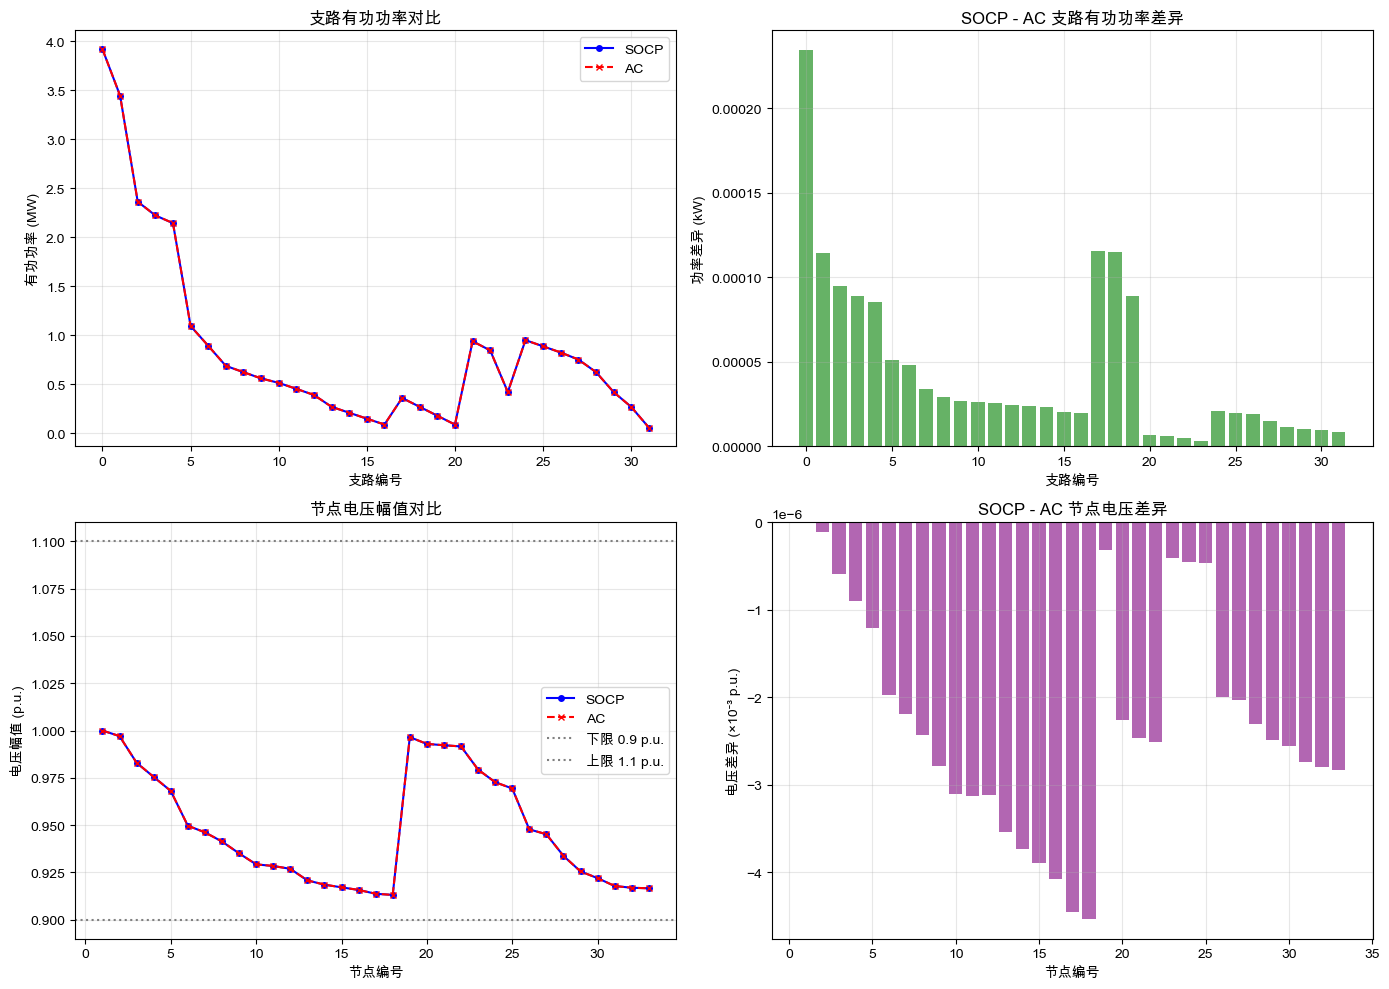


可视化结果已保存到 output/model_comparison.png


In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 苹果电脑最好用这个字体
# 创建图形
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 支路有功功率对比
ax = axes[0, 0]
branch_ids = range(len(df_compare))
ax.plot(branch_ids, df_compare['SOCP_P_MW'], 'b-o', label='SOCP', markersize=4)
ax.plot(branch_ids, df_compare['AC_P_MW'], 'r--x', label='AC', markersize=4)
ax.set_xlabel('支路编号')
ax.set_ylabel('有功功率 (MW)')
ax.set_title('支路有功功率对比')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. 支路有功功率差异
ax = axes[0, 1]
ax.bar(branch_ids, df_compare['P_diff'] * 1000, color='green', alpha=0.6)  # 转换为 kW
ax.set_xlabel('支路编号')
ax.set_ylabel('功率差异 (kW)')
ax.set_title('SOCP - AC 支路有功功率差异')
ax.grid(True, alpha=0.3)

# 3. 节点电压对比
ax = axes[1, 0]
bus_ids = df_compare_bus['bus']
ax.plot(bus_ids, df_compare_bus['SOCP_V_pu'], 'b-o', label='SOCP', markersize=4)
ax.plot(bus_ids, df_compare_bus['AC_V_pu'], 'r--x', label='AC', markersize=4)
ax.axhline(y=0.9, color='gray', linestyle=':', label='下限 0.9 p.u.')
ax.axhline(y=1.1, color='gray', linestyle=':', label='上限 1.1 p.u.')
ax.set_xlabel('节点编号')
ax.set_ylabel('电压幅值 (p.u.)')
ax.set_title('节点电压幅值对比')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. 节点电压差异
ax = axes[1, 1]
ax.bar(bus_ids, df_compare_bus['V_diff'] * 1000, color='purple', alpha=0.6)  # 转换为更小单位
ax.set_xlabel('节点编号')
ax.set_ylabel('电压差异 (×10⁻³ p.u.)')
ax.set_title('SOCP - AC 节点电压差异')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('output/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n可视化结果已保存到 output/model_comparison.png")

## 6. 松弛间隙统计

In [24]:
# 计算松弛间隙统计
print("\n松弛间隙统计：")
print("="*60)

# 支路功率差异
P_diff = df_compare['P_diff']
print(f"支路有功功率差异：")
print(f"  最大差异: {P_diff.abs().max():.6e} MW")
print(f"  平均差异: {P_diff.abs().mean():.6e} MW")
print(f"  标准差:   {P_diff.std():.6e} MW")

# 电压差异
V_diff = df_compare_bus['V_diff']
print(f"\n节点电压差异：")
print(f"  最大差异: {V_diff.abs().max():.6e} p.u.")
print(f"  平均差异: {V_diff.abs().mean():.6e} p.u.")
print(f"  标准差:   {V_diff.std():.6e} p.u.")

# 判断松弛是否紧
threshold = 1e-6
if P_diff.abs().max() < threshold and V_diff.abs().max() < threshold:
    print(f"\n结论：二阶锥松弛是紧的 (所有差异 < {threshold})")
else:
    print(f"\n结论：二阶锥松弛不紧，存在松弛间隙")


松弛间隙统计：
支路有功功率差异：
  最大差异: 2.342859e-07 MW
  平均差异: 4.451594e-08 MW
  标准差:   4.967688e-08 MW

节点电压差异：
  最大差异: 4.531232e-09 p.u.
  平均差异: 2.252599e-09 p.u.
  标准差:   1.283840e-09 p.u.

结论：二阶锥松弛是紧的 (所有差异 < 1e-06)


## 7. 总结

### 主要发现：

1. **松弛紧性**：SOCP 模型的松弛是紧的，与 AC 模型的精确解几乎相同
2. **求解效率**：两个模型的求解时间相近，但 SOCP 保证全局最优
3. **实用性**：对于辐射状配电网，推荐使用 SOCP 模型

### 输出文件：

- `output/SOCP_branch_t{t}.csv`: SOCP 模型的支路结果
- `output/SOCP_bus_t{t}.csv`: SOCP 模型的节点结果
- `output/SOCP_gen_t{t}.csv`: SOCP 模型的发电机结果
- `output/AC_branch_t{t}.csv`: AC 模型的支路结果
- `output/AC_bus_t{t}.csv`: AC 模型的节点结果
- `output/AC_gen_t{t}.csv`: AC 模型的发电机结果

详细的数学模型对比请参见 `Model_Comparison.md`